In [17]:
import pandas as pd
import string

In [2]:
df_population = pd.read_excel('../../../data/raw/population 2020.xlsx', sheet_name=['Data'])
df_emission = pd.read_excel('../../../data/raw/Public GHG data 1990-2021.xlsx', sheet_name=['Emission Totals'])#this generate lsit, list has no following function but have to convert it to dataframe

In [4]:
Population_data=df_population.get('Data')
Emission_data=df_emission.get('Emission Totals')
Population_data.columns

Index(['Unnamed: 0', 'Connecticut', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Bridgeport-Stamford-Norwalk, CT Metro Area', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8',
       'Hartford-East Hartford-Middletown, CT Metro Area', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'New Haven-Milford, CT Metro Area',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Norwich-New London, CT Metro Area', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Torrington, CT Micro Area', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24',
       'Connecticut (part); Worcester, MA-CT Metro Area', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')

In [5]:
Population_data=Population_data[['Unnamed: 0','Connecticut','Bridgeport-Stamford-Norwalk, CT Metro Area','Hartford-East Hartford-Middletown, CT Metro Area','Torrington, CT Micro Area',
                                 'Connecticut (part); Worcester, MA-CT Metro Area','New Haven-Milford, CT Metro Area','Norwich-New London, CT Metro Area']]
Population_data.head()                        

,Unnamed: 0,Connecticut,"Bridgeport-Stamford-Norwalk, CT Metro Area","Hartford-East Hartford-Middletown, CT Metro Area","Torrington, CT Micro Area","Connecticut (part); Worcester, MA-CT Metro Area","New Haven-Milford, CT Metro Area","Norwich-New London, CT Metro Area"
0,Label,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate
1,SEX AND AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Total population,"3,570,549","944,306","1,205,842","181,143","116,657","855,733","266,868"
3,Male,"1,741,688","459,827","588,448","89,565","57,726","412,404","133,718"
4,Female,"1,828,861","484,479","617,394","91,578","58,931","443,329","133,150"


In [11]:
Population_data.iloc[[2,90],:]

,Unnamed: 0,Connecticut,"Bridgeport-Stamford-Norwalk, CT Metro Area","Hartford-East Hartford-Middletown, CT Metro Area","Torrington, CT Micro Area","Connecticut (part); Worcester, MA-CT Metro Area","New Haven-Milford, CT Metro Area","Norwich-New London, CT Metro Area"
2,Total population,"3,570,549","944,306","1,205,842","181,143","116,657","855,733","266,868"
90,Total housing units,"1,521,199","374,329","516,829","88,362","49,840","367,990","123,849"


In [16]:
Emission_data=Emission_data[['Sector Emissions (MMTCO2e)',   2020]]# question to ask: why numbers is not in the index
Emission_data.head()  

,Sector Emissions (MMTCO2e),2020
0,Agriculture,0.346028
1,Natural Gas Leakage,0.240000
2,Commercial,3.824505
3,Commercial (CO2FFC),3.803173
4,Commercial (Stationary),0.021332


In [18]:
#population data at year 2020
Num_CT=Population_data.at[2,'Connecticut']
Num_BSN=Population_data.at[2,'Bridgeport-Stamford-Norwalk, CT Metro Area']
Num_HEHM=Population_data.at[2,'Hartford-East Hartford-Middletown, CT Metro Area']
Num_Tor=Population_data.at[2,'Torrington, CT Micro Area']
Num_Wor_CT=Population_data.at[2,'Connecticut (part); Worcester, MA-CT Metro Area']
Num_NHM=Population_data.at[2,'New Haven-Milford, CT Metro Area']
Num_NNL=Population_data.at[2,'Norwich-New London, CT Metro Area']

Num_CT=int(Num_CT.translate(str.maketrans('','',string.punctuation)))#delete all the punctuation in the string)
Num_BSN=int(Num_BSN.translate(str.maketrans('','',string.punctuation)))
Num_HEHM=int(Num_HEHM.translate(str.maketrans('','',string.punctuation)))
Num_Tor=int(Num_Tor.translate(str.maketrans('','',string.punctuation)))
Num_Wor_CT=int(Num_Wor_CT.translate(str.maketrans('','',string.punctuation)))
Num_NHM=int(Num_NHM.translate(str.maketrans('','',string.punctuation)))
Num_NNL=int(Num_NNL.translate(str.maketrans('','',string.punctuation)))

#ratio of the MSA population to the state population
ra_BSN=Num_BSN/Num_CT
ra_HEHM=Num_HEHM/Num_CT
ra_Tor=Num_Tor/Num_CT
ra_Wor_CT=Num_Wor_CT/Num_CT
ra_NHM=Num_NHM/Num_CT
ra_NNL=Num_NNL/Num_CT

In [21]:
#total emission data at year 2020
Em_CT=Emission_data.at[22,2020]

In [22]:
#calculation of the total emission
Em_BSN=Em_CT*ra_BSN
Em_HEHM=Em_CT*ra_HEHM
Em_Tor=Em_CT*ra_Tor
Em_Wor_CT=Em_CT*ra_Wor_CT
Em_NHM=Em_CT*ra_NHM
Em_NNL=Em_CT*ra_NNL

In [23]:
Population_data=Population_data.iloc[[2],:]
#Population_data.iloc[[2],:].loc[3,:]=['2','MSA emission','ra_BSN','ra_HEHM','ra_Tor','ra_Wor_CT','ra_NHM','ra_NNL']

In [24]:
Population_data.loc[3,:]=['GHG emission',Em_CT,Em_BSN,Em_HEHM,Em_Tor,Em_Wor_CT,Em_NHM,Em_NNL]

In [25]:
Population_data

,Unnamed: 0,Connecticut,"Bridgeport-Stamford-Norwalk, CT Metro Area","Hartford-East Hartford-Middletown, CT Metro Area","Torrington, CT Micro Area","Connecticut (part); Worcester, MA-CT Metro Area","New Haven-Milford, CT Metro Area","Norwich-New London, CT Metro Area"
2,Total population,"3,570,549","944,306","1,205,842","181,143","116,657","855,733","266,868"
3,GHG emission,32.711162,8.651148,11.047179,1.65952,1.068739,7.839696,2.44488


In [26]:
ghg_pop=Population_data.rename(columns={'Unnamed: 0':''}, index={2:1,3:2})

In [27]:
ghg_pop

,,Connecticut,"Bridgeport-Stamford-Norwalk, CT Metro Area","Hartford-East Hartford-Middletown, CT Metro Area","Torrington, CT Micro Area","Connecticut (part); Worcester, MA-CT Metro Area","New Haven-Milford, CT Metro Area","Norwich-New London, CT Metro Area"
1,Total population,"3,570,549","944,306","1,205,842","181,143","116,657","855,733","266,868"
2,GHG emission,32.711162,8.651148,11.047179,1.65952,1.068739,7.839696,2.44488


Text(0.5, 1.0, 'High-level estimation of Greenhouse gas emission in year 2020')

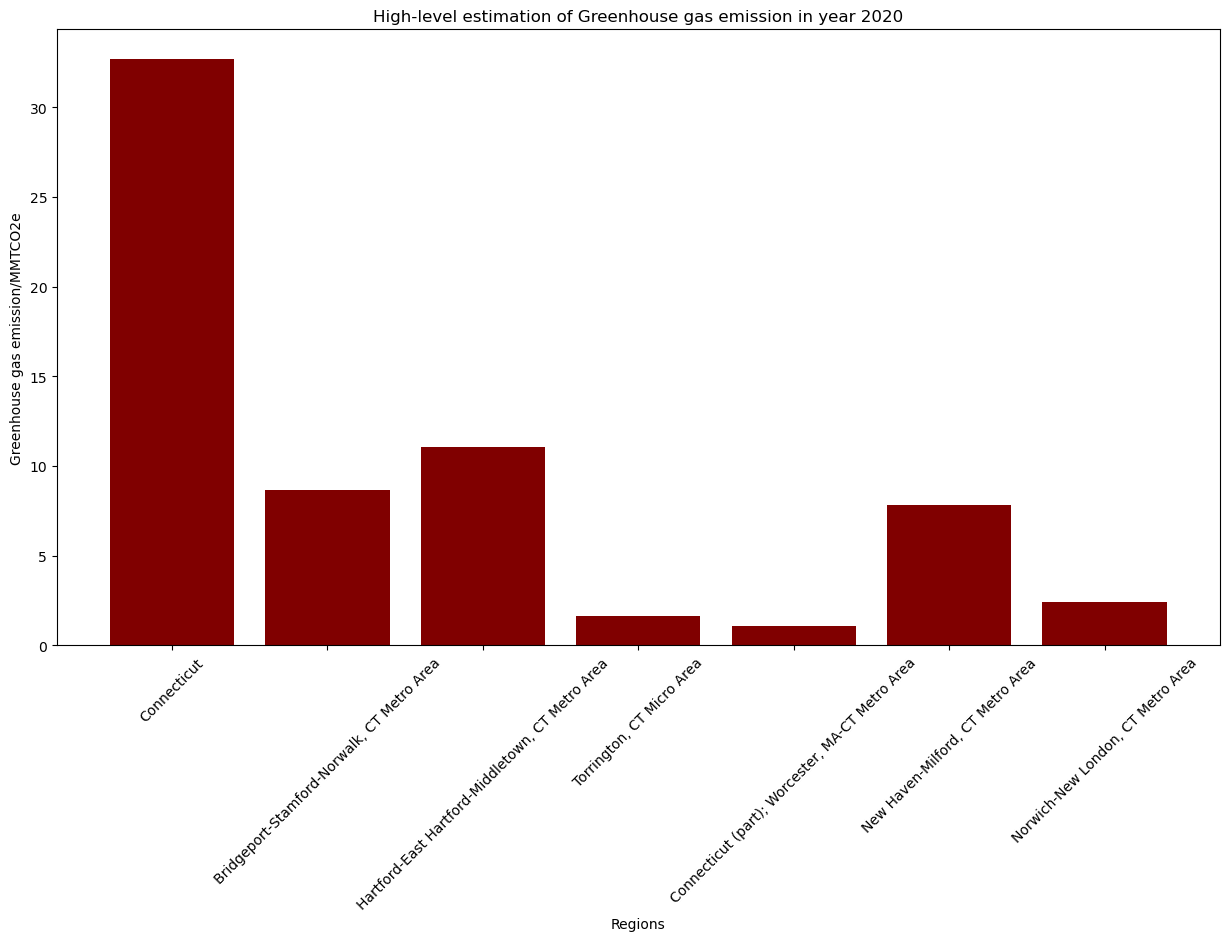

In [37]:
#creating a bar plot
import numpy as np
import matplotlib.pyplot as plt

regions=list(ghg_pop.keys())[1:]
values=list(ghg_pop.loc[2,:])[1:]

fig = plt.figure(figsize=(15,8))
plt.bar(regions,values,color ='maroon',)

plt.xticks(rotation=45, ha='center')
plt.xlabel("Regions")
plt.ylabel("Greenhouse gas emission/MMTCO2e")
plt.title("High-level estimation of Greenhouse gas emission in year 2020")